# Configuration

Import here the libraries you will need

In [ ]:
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, adfuller, kpss, pacf

import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


Define the functions you will use later

In [ ]:
def plot_lines_chart(x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(10,3), dpi=dpi)
    plt.plot(x, y, color='tab:red', linewidth=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def plot_stationary_lines_chart(x, y, data_for_plots, title="", xlabel='Date', ylabel='Value', mycolors=[], dpi=100):
  plt.figure(figsize=(10,6), dpi= dpi)
  for i_row, i_year in enumerate(years):
      plt.plot(x, y,
                data=data_for_plots.loc[data_for_plots.year==i_year, :],
                color=mycolors[i_row],
                label=i_year, linewidth=2)
      plt.text(data_for_plots.loc[data_for_plots.year==i_year, :].shape[0]-.9,
              data_for_plots.loc[data_for_plots.year==i_year, y][-1:].values[0],
              i_year,
              fontsize=12, color=mycolors[i_row])

  plt.yticks(fontsize=12, alpha=.7)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title, fontsize=15)
  plt.show()

Define the variables you will use later

In [ ]:
path = 'AustralianWines.csv'

# Final exercise

Load the ts from the folder data_for_final_exercise and answer the following questions.

Ventas mensuales de vinos australianos.

In [ ]:
data = pd.read_csv(path, sep=',')
data.head(5)

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,Jan-80,2585,464,112.0,1686,85,1954
1,Feb-80,3368,675,118.0,1591,89,2302
2,Mar-80,3210,703,129.0,2304,109,3054
3,Apr-80,3111,887,99.0,1712,95,2414
4,May-80,3756,1139,116.0,1471,91,2226


In [ ]:
data.describe()

,Fortified,Red,Rose,sparkling,Sweet white,Dry white
count,180.000000,180.000000,178.000000,180.000000,180.000000,180.000000
mean,2998.544444,1629.727778,92.286517,2431.288889,247.105556,3240.227778
std,872.044220,614.933333,38.670445,1310.298480,123.318885,722.822894
min,1154.000000,464.000000,30.000000,1170.000000,85.000000,1954.000000
25%,2377.250000,1123.000000,65.000000,1605.000000,141.500000,2736.250000
50%,2894.500000,1559.000000,87.000000,1896.500000,223.500000,3090.000000
75%,3527.000000,2106.250000,112.000000,2599.000000,319.250000,3685.250000
max,5618.000000,3670.000000,267.000000,7242.000000,662.000000,5725.000000


In [ ]:
data.shape

(180, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        180 non-null    object 
 1   Fortified    180 non-null    int64  
 2   Red          180 non-null    int64  
 3   Rose         178 non-null    float64
 4   sparkling    180 non-null    int64  
 5   Sweet white  180 non-null    int64  
 6   Dry white    180 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 10.0+ KB


Hay 2 valores nulos en la columna Rose.

In [ ]:
data.isnull().sum()

Month          0
Fortified      0
Red            0
Rose           2
sparkling      0
Sweet white    0
Dry white      0
dtype: int64

### 1.- Which is the **format** of the date variable? What **frequency** does it have?

Monthly data with 3-letters for the month, and 2 digits for the year.

In [ ]:
# Format of date variable: %b-%y
# Frecuency: Monthly

dateparse = lambda dates: dt.datetime.strptime(dates, '%b-%y')
data = pd.read_csv(path, sep=',',
                   parse_dates=['Month'], index_col='Month', date_parser=dateparse)
data.head(5)

,Fortified,Red,Rose,sparkling,Sweet white,Dry white
Month,,,,,,
1980-01-01,2585,464,112.0,1686,85,1954
1980-02-01,3368,675,118.0,1591,89,2302
1980-03-01,3210,703,129.0,2304,109,3054
1980-04-01,3111,887,99.0,1712,95,2414
1980-05-01,3756,1139,116.0,1471,91,2226


In [ ]:
data.tail()

,Fortified,Red,Rose,sparkling,Sweet white,Dry white
Month,,,,,,
1994-08-01,2294,2665,NaN,1495,205,3670
1994-09-01,2416,2639,46.0,2968,259,4221
1994-10-01,2016,2226,51.0,3385,254,4404
1994-11-01,2799,2586,63.0,3729,275,5086
1994-12-01,2467,2684,84.0,5999,394,5725


In [ ]:
data.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-03-01', '1994-04-01', '1994-05-01', '1994-06-01',
               '1994-07-01', '1994-08-01', '1994-09-01', '1994-10-01',
               '1994-11-01', '1994-12-01'],
              dtype='datetime64[ns]', name='Month', length=180, freq=None)

In [ ]:
data = data.asfreq('MS')
data.index

DatetimeIndex(['1980-01-01', '1980-02-01', '1980-03-01', '1980-04-01',
               '1980-05-01', '1980-06-01', '1980-07-01', '1980-08-01',
               '1980-09-01', '1980-10-01',
               ...
               '1994-03-01', '1994-04-01', '1994-05-01', '1994-06-01',
               '1994-07-01', '1994-08-01', '1994-09-01', '1994-10-01',
               '1994-11-01', '1994-12-01'],
              dtype='datetime64[ns]', name='Month', length=180, freq='MS')

In [ ]:
data['total_sales'] = data[['Fortified','Red','Rose','sparkling','Sweet white','Dry white']].sum(axis=1)
data.head()

,Fortified,Red,Rose,sparkling,Sweet white,Dry white,total_sales
Month,,,,,,,
1980-01-01,2585,464,112.0,1686,85,1954,6886.0
1980-02-01,3368,675,118.0,1591,89,2302,8143.0
1980-03-01,3210,703,129.0,2304,109,3054,9509.0
1980-04-01,3111,887,99.0,1712,95,2414,8318.0
1980-05-01,3756,1139,116.0,1471,91,2226,8799.0


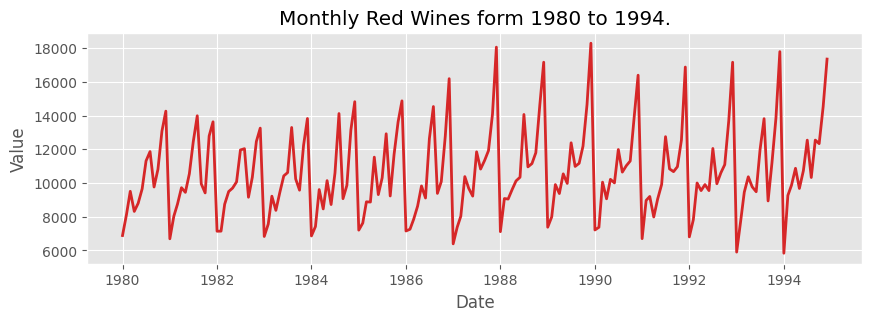

In [ ]:
plot_lines_chart(x=data.index, y=data.total_sales, title='Monthly Red Wines form 1980 to 1994.')

No tiene tendencia ya que no crece o decrece.

Es estacionaria, dado que tiene frecuencia.

In [ ]:
data_for_plots = data.copy()
data_for_plots.reset_index(inplace=True)
data_for_plots.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white,total_sales
0,1980-01-01,2585,464,112.0,1686,85,1954,6886.0
1,1980-02-01,3368,675,118.0,1591,89,2302,8143.0
2,1980-03-01,3210,703,129.0,2304,109,3054,9509.0
3,1980-04-01,3111,887,99.0,1712,95,2414,8318.0
4,1980-05-01,3756,1139,116.0,1471,91,2226,8799.0


In [ ]:
data_for_plots['year'] = [d.year for d in data_for_plots.Month]
data_for_plots['month'] = [d.strftime('%b') for d in data_for_plots.Month]
data_for_plots['month_n'] = [d.strftime('%m') for d in data_for_plots.Month]
data_for_plots.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white,total_sales,year,month,month_n
0,1980-01-01,2585,464,112.0,1686,85,1954,6886.0,1980,Jan,01
1,1980-02-01,3368,675,118.0,1591,89,2302,8143.0,1980,Feb,02
2,1980-03-01,3210,703,129.0,2304,109,3054,9509.0,1980,Mar,03
3,1980-04-01,3111,887,99.0,1712,95,2414,8318.0,1980,Apr,04
4,1980-05-01,3756,1139,116.0,1471,91,2226,8799.0,1980,May,05


In [ ]:
years = data_for_plots['year'].unique()
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow'],
      dtype='<U31')

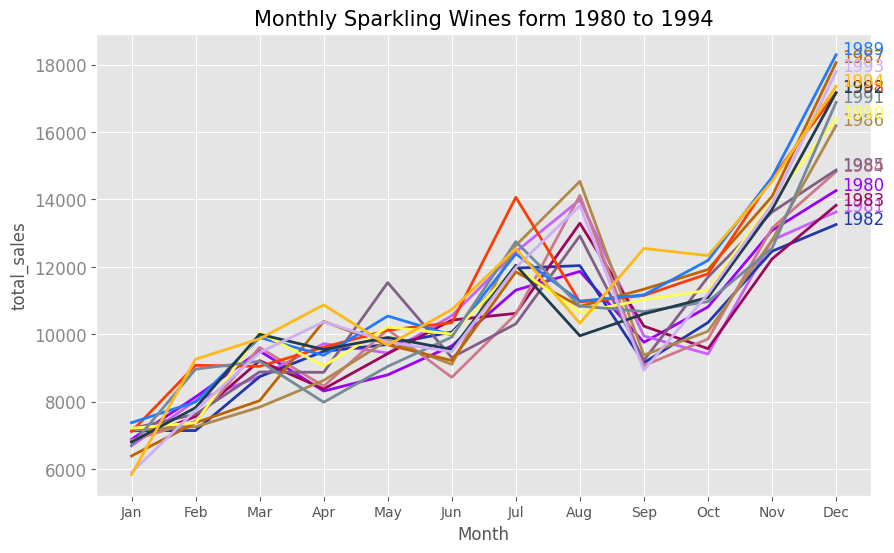

In [ ]:
plot_stationary_lines_chart('month', 'total_sales', data_for_plots,
                            'Monthly Sparkling Wines form 1980 to 1994', 'Month', 'total_sales', mycolors)

<ipython-input-17-cba88047f015>:12: RuntimeWarning: Second argument 'Red' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  plt.plot(x, y,


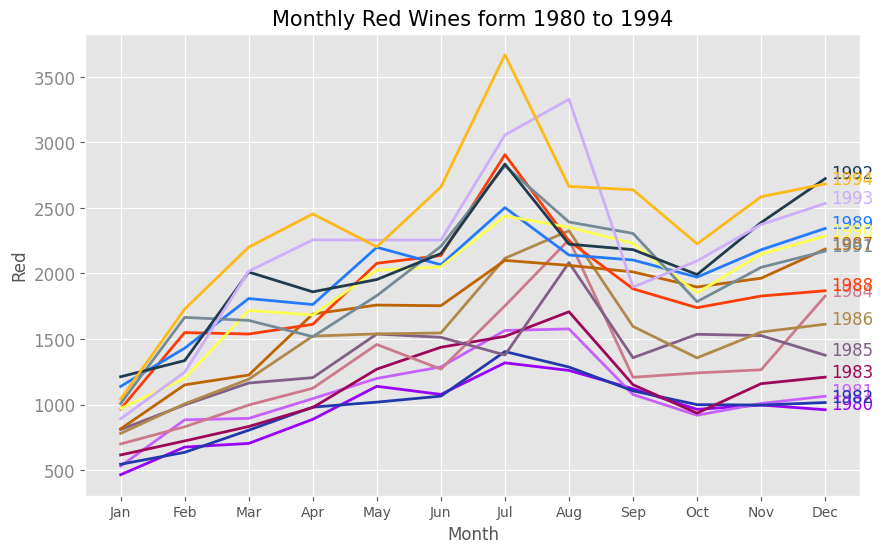

In [ ]:
plot_stationary_lines_chart('month', 'Red', data_for_plots,
                            'Monthly Red Wines form 1980 to 1994', 'Month', 'Red', mycolors)

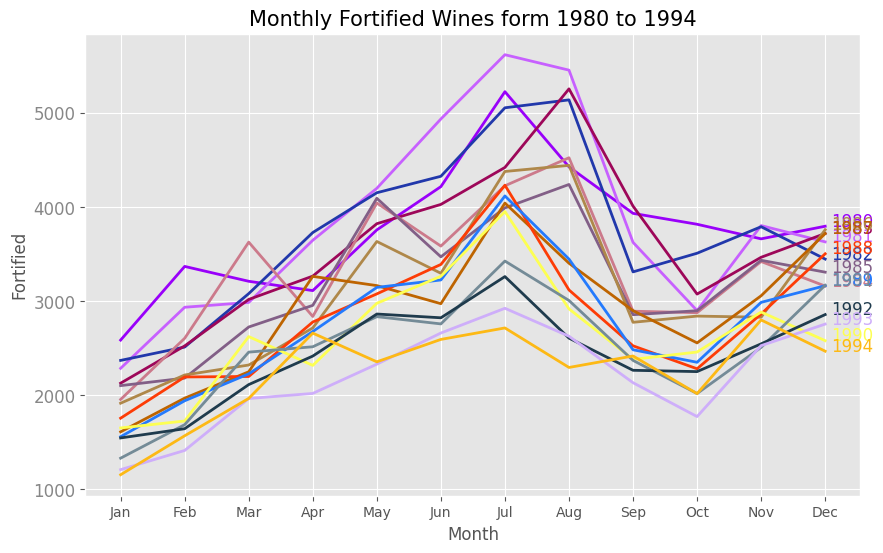

In [ ]:
plot_stationary_lines_chart('month', 'Fortified', data_for_plots,
                            'Monthly Fortified Wines form 1980 to 1994', 'Month', 'Fortified', mycolors)

In [ ]:
data.shape

(180, 6)

### 2.- Does the ts follow an **additive or a multiplicative** model?

Respuesta: Es multiplicativa.

### 3.- **Decompose** the ts, can you observe a **trend** or a **seasonal component**?

La media, la varianza y la co-varianza.

Aditiva no se abren los dedos, Multiplicativa, es necesario abrir y cerrar los dedos.

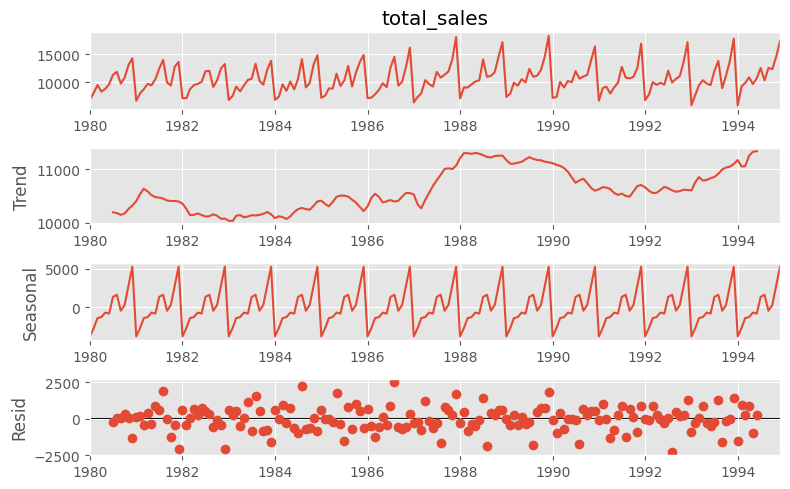

In [ ]:
data_add = seasonal_decompose(data['total_sales'], model='additive')
data_add.plot();

In [ ]:
data_add.resid.mean(), data_add.resid.std()

(1.8526785714290208, 853.2388618388718)

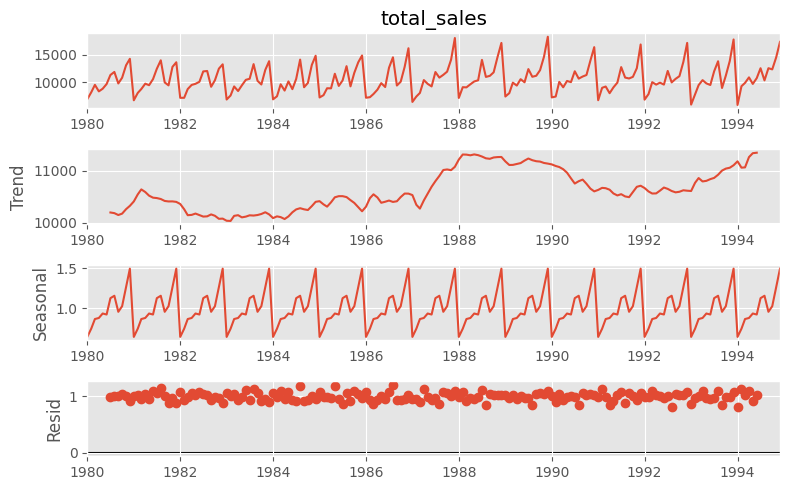

In [ ]:
data_mult = seasonal_decompose(data['total_sales'], model='multiplicative')
data_mult.plot();

In [ ]:
data_mult.resid.mean(), data_add.resid.std()

(1.000339045664182, 853.2388618388718)

We have a time series of 180 values, monthly.
We build a component of 10 chunks with 18 integers.

In [ ]:
time_series_ad = []
seasonal_ad = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12, 27, 22, 30, 28, 16, 23]

for chunk in np.split(data.Fortified.values, 10):
    for i, value in enumerate(chunk):
        time_series_ad.append(value + seasonal_ad[i])

df_ad = pd.DataFrame(data={'y': time_series_ad},
                     index = data.index)
df_ad.head()

,y
Month,
1980-01-01,2596
1980-02-01,3381
1980-03-01,3222
1980-04-01,3126
1980-05-01,3775


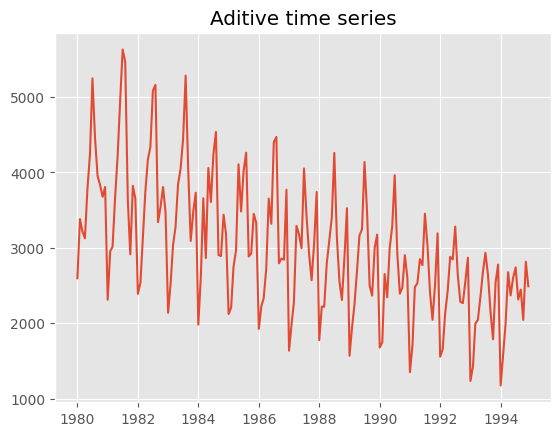

In [ ]:
plt.title('Aditive time series')
plt.plot(df_ad);

In [ ]:
time_series_mult = []
seasonal_mult = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12, 27, 22, 30, 28, 16, 23]

for chunk in np.split(data.Fortified.values, 10):
    for i, value in enumerate(chunk):
        time_series_mult.append(value * seasonal_mult[i])

df_mult = pd.DataFrame(data = {'y': time_series_mult},
                     index = data.index)
df_mult.head()

,y
Month,
1980-01-01,28435
1980-02-01,43784
1980-03-01,38520
1980-04-01,46665
1980-05-01,71364


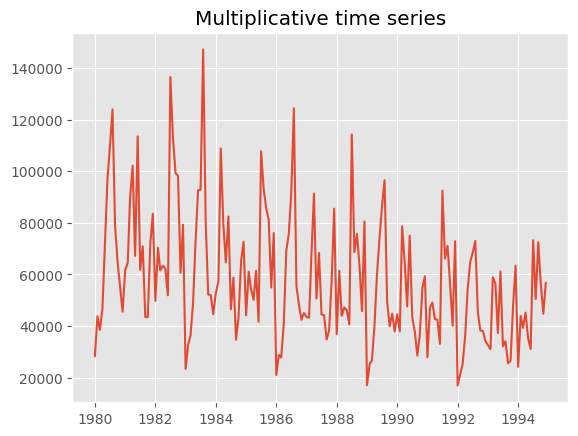

In [ ]:
plt.title('Multiplicative time series')
plt.plot(df_mult);

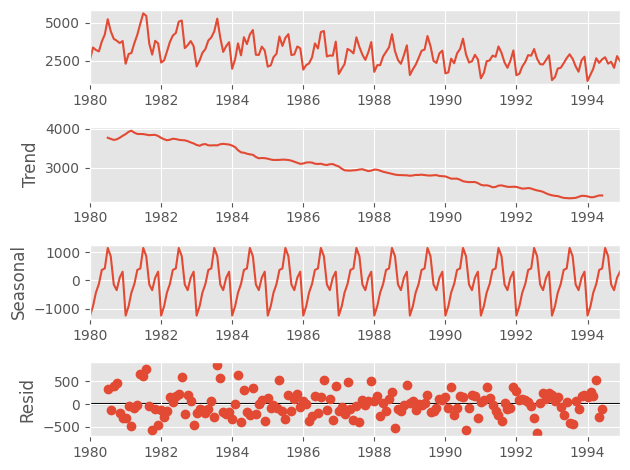

In [ ]:
seasonal_decompose(df_ad, model='additive').plot();

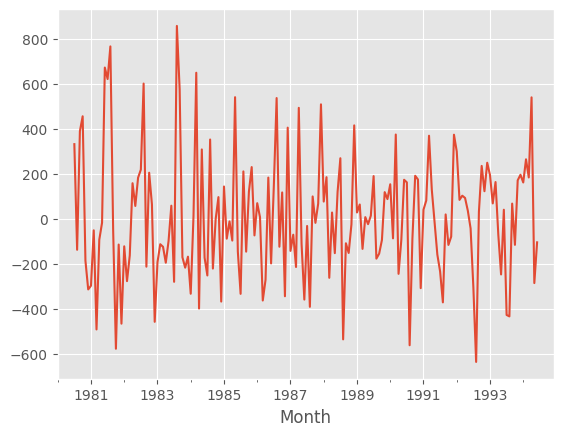

In [ ]:
seasonal_decompose(df_ad, model='additive').resid.plot();

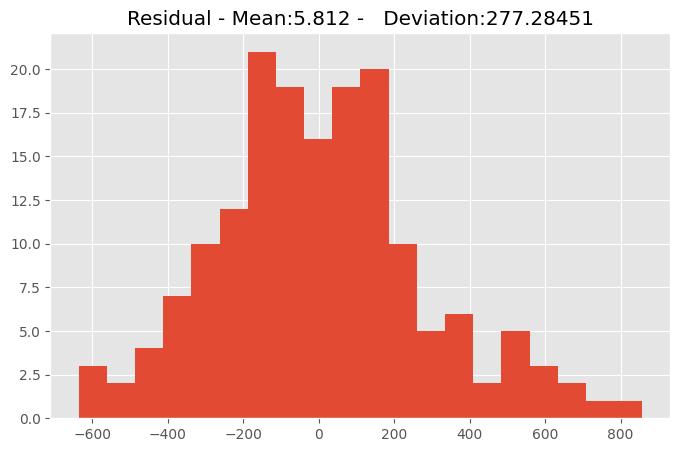

In [ ]:
rcParams['figure.figsize'] = 8, 5
seasonal_decompose(df_ad, model='additive').resid.hist(bins=20)
plt.title(f"Residual - Mean:{round(seasonal_decompose(df_ad, model='additive').resid.mean(), 5)} - \
  Deviation:{round(seasonal_decompose(df_ad, model='additive').resid.std(), 5)}");

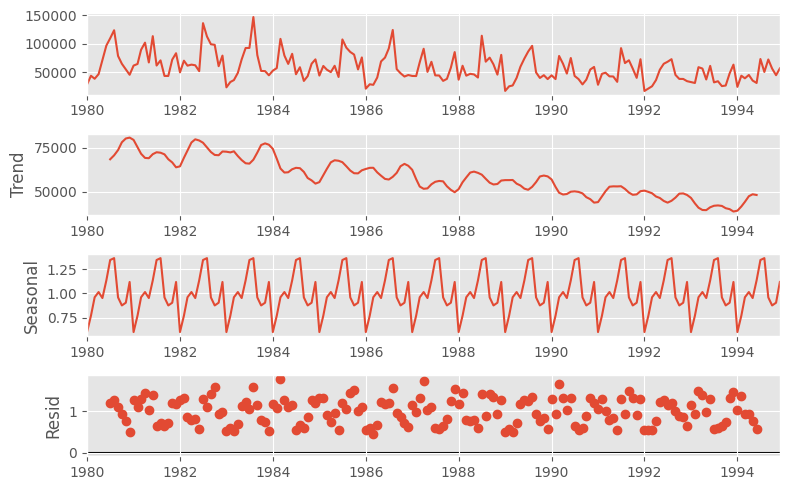

In [ ]:
seasonal_decompose(df_mult, model='multiplicative').plot();

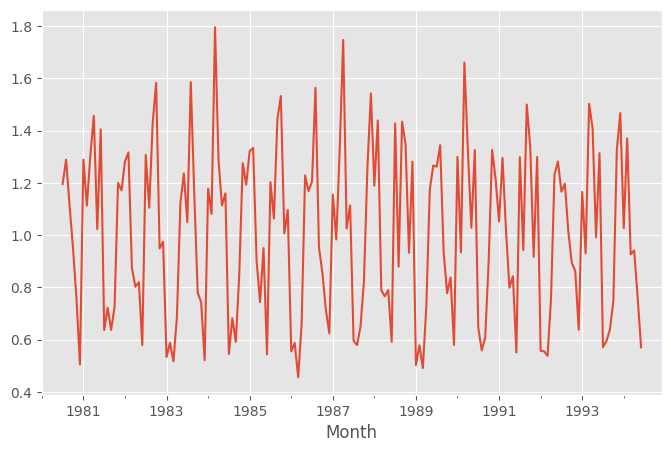

In [ ]:
seasonal_decompose(df_mult, model='multiplicative').resid.plot();

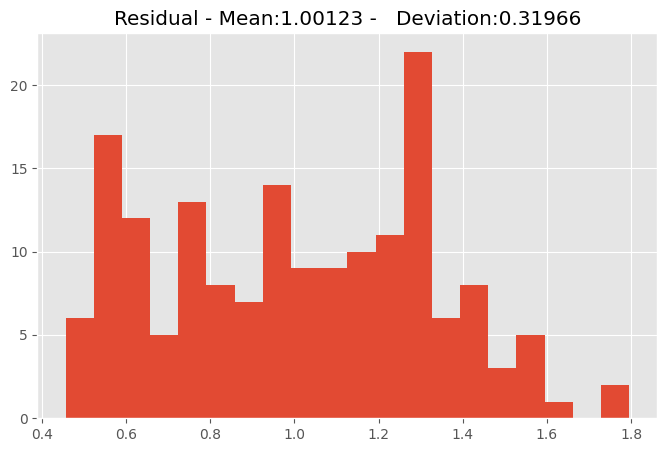

In [ ]:
rcParams['figure.figsize'] = 8, 5
seasonal_decompose(df_mult, model='multiplicative').resid.hist(bins=20)
plt.title(f"Residual - Mean:{round(seasonal_decompose(df_ad, model='multiplicative').resid.mean(), 5)} - \
  Deviation:{round(seasonal_decompose(df_mult, model='multiplicative').resid.std(), 5)}");

### 4.- Is it **stationary**? If not, which **steps** did you apply to make it stationary?

1. test stationary
2. autocorrelation
3. test estadístico: interpretdftest

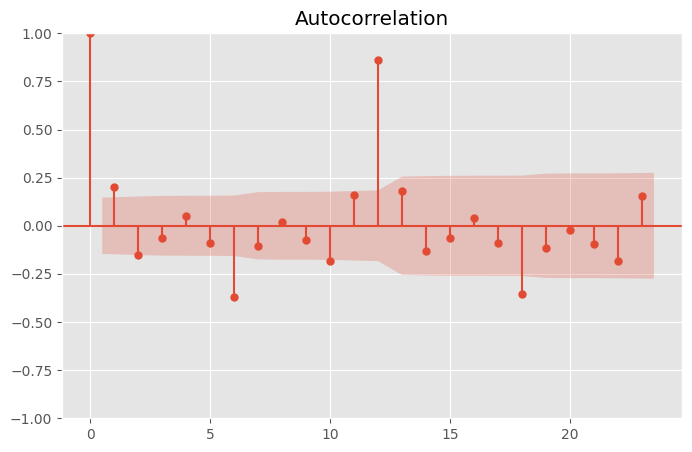

In [ ]:
plot_acf(data['total_sales']);

Correlación, se repite en cada mes, de cada año
Zona azul, umbral, intervalo de confianza.

Si no es estacionaria, es necesario transformarla a un proceso estacionario.

### 5.- Build a **benchmark** model to predict the last 8 periods. Choose an **error measurement** and obtain the error of the prediction.

### 6.- Build an **AR** or a **MA** model. How does the **error** change?

### 7.- Build an **ARIMA** or **SARIMA** model. How does it affect to the **error**?

### 8.- Use **auto_arima** functionality, how does it affect to the **error**?

### 9.- Build a model with **Prophet**, does the **error** increase or decrease?

### 10.- Finally, which is the **best** model?